In [1]:
import pandas as pd
import numpy as np
import string
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve,roc_auc_score

# Reading the data

In [2]:
df=pd.read_csv('spam.csv', sep=',', names = ['label','msg','ex1','ex2','ex3'], header = 0) 
df.head()        

,label,msg,ex1,ex2,ex3
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Pre-processing the data

In [3]:
df = df.drop(["ex1","ex2","ex3"], axis = 1)  

In [4]:
df.head() 

,label,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df['label'] = df.label.map({'ham':0, 'spam':1}) 

In [6]:
df.shape 

(5572, 2)

In [ ]:
x = []
for i in range(len(df)): 
        x.append(df.loc[i,"msg"]) 

In [ ]:
#Removing the punctuations 
y = []
for i in range(len(df)): 
    y.append(x[i].translate(None, string.punctuation))  

In [ ]:
#Removing digits
z = [] 
for p in range(len(df)): 
    z.append(''.join([i for i in y[p] if not i.isdigit()])) 

In [ ]:
#Splitting the words 
X = []
for i in range(len(y)):
    X.append(y[i].split()) 

In [7]:
#Train - test split
X_train, X_test, y_train, y_test = train_test_split(df['msg'],
                                                    df['label'],
                                                    random_state=42)  

In [8]:
#Applyin Count Vectorizer to create a one-hot encoded feature matrix
vectorizer = CountVectorizer(analyzer='word', binary=False, decode_error='ignore',
         encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents= 'ascii', 
        tokenizer=None, vocabulary=None) 

In [ ]:
vectorizer.fit(z)   
vectorizer.get_feature_names()            

In [ ]:
doc_array = vectorizer.transform(z).toarray() 
doc_array 

In [ ]:
len(doc_array) 

In [ ]:
df['label'][0:3]

In [9]:
X_train = vectorizer.fit_transform(X_train) 
X_test = vectorizer.transform(X_test) 

# Naive Bayes

In [10]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha= 1, class_prior=None, fit_prior=True)  
clf.fit(X_train, y_train)   

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [11]:
np.mean(cross_val_score(clf,X_train, y_train))   

0.98013551756389961

In [12]:
train_pred = clf.predict(X_train)   
test_pred = clf.predict(X_test) 

In [13]:
print('accuracy score: '),format(accuracy_score(y_train,train_pred)) 
print('precision score: '),format(precision_score(y_train,train_pred))   
print('recall score: '),format(recall_score(y_train,train_pred))  
print('f1_score: %.8f') % (f1_score(y_train,train_pred)) 

accuracy score:  0.994256999282
precision score:  0.983636363636
recall score:  0.973021582734
f1_score: 0.97830018


In [14]:
print('accuracy score: '),format(accuracy_score(y_test,test_pred)) 
print('precision score: '),format(precision_score(y_test,test_pred))  
print('recall score: '),format(recall_score(y_test,test_pred)) 
print('f1_score: %.8f') % (f1_score(y_test,test_pred)) 

accuracy score:  0.982053122757
precision score:  0.982558139535
recall score:  0.884816753927
f1_score: 0.93112948


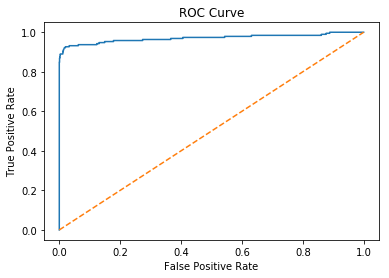

In [15]:
probas_ = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
fpr = fpr.tolist()
tpr = tpr.tolist()
fpr.insert(0,0)
tpr.insert(0,0)
plt.plot(fpr,tpr)
xspan = np.linspace(0,1)
yspan = xspan
plt.plot(xspan, yspan, '--') 
plt.plot() 
plt.title("ROC Curve") 
plt.xlabel("False Positive Rate") 
plt.ylabel("True Positive Rate") 
plt.show() 

In [16]:
roc_auc_score(y_test, probas_[:,1])  

0.97049420250716534

# SVM

In [17]:
from sklearn.svm import SVC

clf_svm = SVC(C= 1.0, class_weight = 'balanced')    
clf_svm.fit(X_train, y_train)      

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
pred_svm_train = clf_svm.predict(X_train)       
pred_svm_test = clf_svm.predict(X_test)  

In [19]:
print('accuracy score_train: '),format(accuracy_score(y_train,pred_svm_train))
print('precision score_train: '),format(precision_score(y_train,pred_svm_train))
print('recall score_train: %.8f') % (recall_score(y_train,pred_svm_train)) 
print('f1_score: %.8f') % (f1_score(y_train,pred_svm_train))        

accuracy score_train:  0.935151950227
precision score_train:  0.85536159601
recall score_train: 0.61690647
f1_score: 0.71682341


In [20]:
print('accuracy score_test: '),format(accuracy_score(y_test,pred_svm_test)) 
print('precision score_test: '),format(precision_score(y_test,pred_svm_test)) 
print('recall score_test: %0.8f') %(recall_score(y_test,pred_svm_test)) 

accuracy score_test:  0.926058865757
precision score_test:  0.828358208955
recall score_test: 0.58115183


In [21]:
fpr, tpr, thresholds = roc_curve(y_test, clf_svm.decision_function(X_test))  

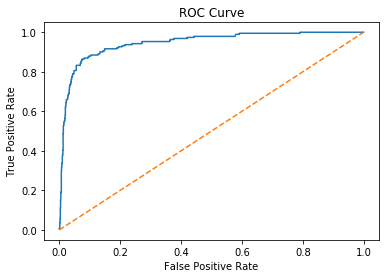

In [22]:
plt.plot(fpr,tpr)
xspan = np.linspace(0,1) 
yspan = xspan
plt.plot(xspan, yspan, '--') 
plt.plot() 
plt.title("ROC Curve") 
plt.xlabel("False Positive Rate") 
plt.ylabel("True Positive Rate") 
plt.show() 

In [23]:
roc_auc_score(y_test, clf_svm.decision_function(X_test))   

0.94614995949159775